<a href="https://colab.research.google.com/github/Code-By-Pitt/Capstone3/blob/main/Capstone_3_Data_Wrangling_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Only necessary to run this cell once
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Wrangling

Aim of this capstone is to use Deep Learning RNN to predict upcoming conversions from marketing activity. 

## Import Data & libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

df = pd.read_csv("/content/gdrive/MyDrive/Springboard/Capstone2/Raw_Data/Raw_Data.csv",parse_dates=['Day'])

## Data Inspection

In [ ]:
df.head(2)

,Day,Campaign status,Campaign,Budget name,Currency code,Budget,Budget type,Status,Status reasons,Optimization score,Bid strategy type,Campaign type,Impr.,Clicks,CTR,Avg. CPC,Cost,Conversions,Conversions (by conv. time),Conv. value (by conv. time),All conv.,All conv. value,Store visits,Cost / conv.,Conv. rate,Conv. value,Conv. value / cost,Search impr. share,Search lost IS (rank),Search lost IS (budget),Search top IS,Search lost top IS (rank),Search lost top IS (budget),Search abs. top IS,Search lost abs. top IS (rank),Search lost abs. top IS (budget),Search exact match IS,Click share,Invalid clicks,Impr. (Abs. Top) %,Impr. (Top) %,Value / conv.,View-through conv.,View-through store visits,Store visit value,% new sessions,Store Sales,Store Visits,Store Revenue,Avg. target CPA optimization,Avg. target CPA,Avg. target ROAS optimization,Avg. target ROAS
0,2019-02-15,Enabled,{Google - Generic - Beds Brands - NVK - BMM},--,GBP,630.0,Daily,Eligible,some ads limited by policy,78.63,Target ROAS,Search,0,0,--,--,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00%,0.00,0.00,--,--,--,--,--,--,--,--,--,--,--,0,--,--,0.00,0,0,0.0,--,0,0.0,£0.00,--,--,--,--
1,2019-05-11,Enabled,{Google - Generic - Beds Brands - NVK - BMM},--,GBP,630.0,Daily,Eligible,some ads limited by policy,78.63,Target ROAS,Search,0,0,--,--,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00%,0.00,0.00,--,--,--,--,--,--,--,--,--,--,--,0,--,--,0.00,0,0,0.0,--,0,0.0,£0.00,--,--,--,--


# Updating Data Types

most columns listed above were imported with the wrong data type due to commas (",") in row values. The next step is removing any unwanted symbols and updating the data types. To do this, i used the "str.replace" method and "astype" method. 

In [ ]:
for col in ['Clicks', 'Impr.']:
    df[col]=df[col].str.replace(",","").astype(int)
    
for col in ['Conv. value', 'All conv.','All conv. value']:
    df[col]=df[col].str.replace(",","").astype(float)    

df["Store Revenue"] = df["Store Revenue"].str.replace("£","").str.replace(",","").astype(float)

In [ ]:
for col in ["Click share","Search impr. share","Search lost IS (rank)","Search lost IS (budget)"]:
    df[col] = df[col].str.replace(" --","0").str.replace("< 10%","0.09").str.replace(">","").str.replace("%","").str.strip().astype(float)

# Core Dataset

Now that the data types are updated, we can create our core dataset. 

In [ ]:
core_df = df[['Day','Campaign','Clicks', 'Impr.','Cost','Conversions','Conv. value','Store Visits','Store Revenue']]

In [ ]:
core_df.dtypes

Day              datetime64[ns]
Campaign                 object
Clicks                    int64
Impr.                     int64
Cost                    float64
Conversions             float64
Conv. value             float64
Store Visits            float64
Store Revenue           float64
dtype: object

In [ ]:
core_df.describe()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue
count,107730.000000,1.077300e+05,107730.000000,107730.000000,107730.000000,107730.000000,107730.000000
mean,167.763121,7.550237e+03,70.762098,2.226363,1008.693889,7.529670,832.922419
std,624.870090,4.509005e+04,298.634425,11.042734,5370.788128,31.453462,3914.106541
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.200000e+01,0.610000,0.000000,0.000000,0.000000,0.000000
75%,95.000000,2.005000e+03,29.790000,0.910000,156.975000,2.710000,0.000000
max,31074.000000,2.856543e+06,21549.840000,697.460000,353621.870000,874.000000,133685.660000


In [ ]:
# create a list of our conditions
conditions = [
    (core_df['Campaign'].str.contains('Shopping',regex=False)),
    (core_df['Campaign'].str.contains('Generic',regex=False)),
    (core_df['Campaign'].str.contains('Trademark',regex=False))
    ]

# create a list of the values we want to assign for each condition
values = ['Shopping', 'Generic', 'Trademark']

# create a new column and use np.select to assign values to it using our lists as arguments
core_df['campaign_label'] = np.select(conditions, values)

# display updated DataFrame
core_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Day,Campaign,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,campaign_label
0,2019-02-15,{Google - Generic - Beds Brands - NVK - BMM},0,0,0.00,0.0,0.0,0.0,0.0,Generic
1,2019-05-11,{Google - Generic - Beds Brands - NVK - BMM},0,0,0.00,0.0,0.0,0.0,0.0,Generic
2,2019-01-10,{Google - Generic - Mattresses Competitors - N...,13,1943,6.29,0.0,0.0,1.0,0.0,Generic
3,2020-02-12,{Google - Generic - Beds Brands - NVK - BMM},0,0,0.00,0.0,0.0,0.0,0.0,Generic
4,2021-03-19,{Google - Generic - Beds Brands - NVK - BMM},0,2,0.00,0.0,0.0,0.0,0.0,Generic


# Build Daily Breakdown Dataframe



1.   Group Data - Summed by date
2.   Remove zero values
3.   Add additional Columns
4.   Save dataset







In [ ]:
groupedDailyDf = core_df.groupby(["Day"])[['Clicks', 'Impr.','Cost','Conversions','Conv. value','Store Visits','Store Revenue']].sum().reset_index()
groupedDailyDf.head()

,Day,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue
0,2019-01-01,36282,900692,19046.00,468.38,192155.13,2241.0,214692.73
1,2019-01-02,31427,845475,19203.78,436.14,190096.70,1930.0,177250.80
2,2019-01-03,21733,443912,8636.91,276.43,124545.09,1526.0,169825.05
3,2019-01-04,22504,566771,9901.17,236.32,118262.33,1677.0,152465.03
4,2019-01-05,26498,771739,12914.47,314.83,151001.47,2064.0,195490.67


In [ ]:
nonZeroImpr = (groupedDailyDf["Cost"] > 0)
groupedDailyDf = groupedDailyDf[nonZeroImpr]
groupedDailyDf.describe()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue
count,932.000000,9.320000e+02,932.000000,932.000000,9.320000e+02,932.000000,932.000000
mean,19391.760730,8.727328e+05,8179.400021,257.345536,1.165951e+05,870.355494,96277.609624
std,13338.809558,6.781347e+05,7641.762584,201.517863,9.079556e+04,714.720260,65923.457735
min,4068.000000,9.489000e+03,606.230000,50.610000,1.404978e+04,0.000000,0.000000
25%,11554.000000,4.454905e+05,4591.060000,151.435000,6.968504e+04,343.820000,58446.927500
50%,16384.000000,6.981355e+05,6577.120000,215.345000,9.752775e+04,815.000000,95041.260000
75%,23430.250000,1.145392e+06,8967.450000,308.545000,1.373769e+05,1254.962500,133297.530000
max,135711.000000,5.555631e+06,69465.880000,2642.960000,1.244094e+06,6410.000000,631367.170000


In [ ]:
groupedDailyDf['Day'] = pd.to_datetime(groupedDailyDf['Day'])
groupedDailyDf['dayName'] = groupedDailyDf['Day'].dt.day_name()
groupedDailyDf['DayofYear'] = groupedDailyDf['Day'].dt.dayofyear
groupedDailyDf['Week_no'] = groupedDailyDf['Day'].dt.isocalendar().week
groupedDailyDf['year'] = groupedDailyDf['Day'].dt.year
groupedDailyDf['MonthName'] = groupedDailyDf['Day'].dt.month_name()
groupedDailyDf['Quarter'] = groupedDailyDf['Day'].dt.quarter
groupedDailyDf['CPA'] = groupedDailyDf['Cost']/groupedDailyDf['Conversions']
groupedDailyDf['CTR'] = groupedDailyDf['Clicks']/groupedDailyDf['Impr.']
groupedDailyDf['CPC'] =groupedDailyDf['Cost']/groupedDailyDf['Clicks']
groupedDailyDf['AOV'] = groupedDailyDf['Conv. value']/groupedDailyDf['Cost']
groupedDailyDf['Quarter2'] = groupedDailyDf['Quarter'].map({1:'Q1', 2:'Q2', 3:'Q3',4:'Q4'})
groupedDailyDf.fillna(0,inplace=True)
groupedDailyDf.replace([np.inf, -np.inf], 0,inplace=True)
groupedDailyDf['WeekStart']  = groupedDailyDf['Day'] - pd.to_timedelta(arg=groupedDailyDf['Day'].dt.isocalendar().week, unit='D')
groupedDailyDf.head()

,Day,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,dayName,DayofYear,Week_no,year,MonthName,Quarter,CPA,CTR,CPC,AOV,Quarter2,WeekStart
0,2019-01-01,36282,900692,19046.00,468.38,192155.13,2241.0,214692.73,Tuesday,1,1,2019,January,1,40.663564,0.040282,0.524943,10.089002,Q1,2018-12-31
1,2019-01-02,31427,845475,19203.78,436.14,190096.70,1930.0,177250.80,Wednesday,2,1,2019,January,1,44.031229,0.037171,0.611060,9.898921,Q1,2019-01-01
2,2019-01-03,21733,443912,8636.91,276.43,124545.09,1526.0,169825.05,Thursday,3,1,2019,January,1,31.244474,0.048958,0.397410,14.420098,Q1,2019-01-02
3,2019-01-04,22504,566771,9901.17,236.32,118262.33,1677.0,152465.03,Friday,4,1,2019,January,1,41.897300,0.039706,0.439974,11.944278,Q1,2019-01-03
4,2019-01-05,26498,771739,12914.47,314.83,151001.47,2064.0,195490.67,Saturday,5,1,2019,January,1,41.020455,0.034335,0.487375,11.692425,Q1,2019-01-04


In [ ]:
groupedDailyDf.to_csv(r'/content/gdrive/MyDrive/Springboard/Captsone 3/DataFiles/Cap3_cleaned_daily_data.csv', index = False, header=True)

# Build Dataframe grouped By Day and Campaign Type


1.   Group Data - Summed by date
2.   Remove zero values
3.   Add additional Columns
4.   Save dataset

In [ ]:
grouped_CT_Daily_Df = core_df.groupby(["Day","campaign_label"])[['Clicks', 'Impr.','Cost','Conversions','Conv. value','Store Visits','Store Revenue']].sum().reset_index()
grouped_CT_Daily_Df.head()

,Day,campaign_label,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue
0,2019-01-01,Generic,17970,858513,13812.03,128.65,49697.70,688.0,57110.39
1,2019-01-01,Shopping,0,0,0.00,0.00,0.00,0.0,0.00
2,2019-01-01,Trademark,18312,42179,5233.97,339.73,142457.43,1553.0,157582.34
3,2019-01-02,Generic,16125,809083,14290.89,137.04,55892.99,599.0,38713.52
4,2019-01-02,Shopping,0,0,0.00,0.00,0.00,0.0,0.00


In [ ]:
nonZeroImpr = (grouped_CT_Daily_Df["Impr."] >= 10)
grouped_CT_Daily_Df = grouped_CT_Daily_Df[nonZeroImpr]
grouped_CT_Daily_Df.describe()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue
count,2396.000000,2.396000e+03,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,7543.038815,3.394770e+05,3181.636402,100.102688,45353.335822,338.552304,37450.222108
std,5170.134046,4.537789e+05,3574.812444,91.379342,43327.121937,293.191198,37234.020066
min,20.000000,4.000000e+01,1.280000,0.000000,0.000000,0.000000,0.000000
25%,4584.750000,1.481275e+04,1160.732500,40.485000,17493.407500,103.860000,11888.190000
50%,6355.000000,1.597760e+05,2083.105000,80.135000,35303.600000,306.525000,25201.435000
75%,8999.750000,5.336112e+05,4013.550000,135.142500,61472.825000,507.020000,55322.155000
max,54438.000000,4.993630e+06,36666.040000,1244.460000,633763.910000,2661.000000,385610.540000


In [ ]:
grouped_CT_Daily_Df['Day'] = pd.to_datetime(grouped_CT_Daily_Df['Day'])
grouped_CT_Daily_Df['dayName'] = grouped_CT_Daily_Df['Day'].dt.day_name()
grouped_CT_Daily_Df['DayofYear'] = grouped_CT_Daily_Df['Day'].dt.dayofyear
grouped_CT_Daily_Df['Week_no'] = grouped_CT_Daily_Df['Day'].dt.isocalendar().week
grouped_CT_Daily_Df['year'] = grouped_CT_Daily_Df['Day'].dt.year
grouped_CT_Daily_Df['MonthName'] = grouped_CT_Daily_Df['Day'].dt.month_name()
grouped_CT_Daily_Df['Quarter'] = grouped_CT_Daily_Df['Day'].dt.quarter
grouped_CT_Daily_Df['CPA'] = grouped_CT_Daily_Df['Cost']/grouped_CT_Daily_Df['Conversions']
grouped_CT_Daily_Df['CTR'] = grouped_CT_Daily_Df['Clicks']/grouped_CT_Daily_Df['Impr.']
grouped_CT_Daily_Df['CPC'] =grouped_CT_Daily_Df['Cost']/grouped_CT_Daily_Df['Clicks']
grouped_CT_Daily_Df['AOV'] = grouped_CT_Daily_Df['Conv. value']/grouped_CT_Daily_Df['Cost']
grouped_CT_Daily_Df['Quarter2'] = grouped_CT_Daily_Df['Quarter'].map({1:'Q1', 2:'Q2', 3:'Q3',4:'Q4'})
grouped_CT_Daily_Df.fillna(0,inplace=True)
grouped_CT_Daily_Df.replace([np.inf, -np.inf], 0,inplace=True)
grouped_CT_Daily_Df['WeekStart']  =grouped_CT_Daily_Df['Day'] - pd.to_timedelta(arg=grouped_CT_Daily_Df['Day'].dt.isocalendar().week, unit='D')
grouped_CT_Daily_Df.head()

,Day,campaign_label,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,dayName,DayofYear,Week_no,year,MonthName,Quarter,CPA,CTR,CPC,AOV,Quarter2,WeekStart
0,2019-01-01,Generic,17970,858513,13812.03,128.65,49697.70,688.0,57110.39,Tuesday,1,1,2019,January,1,107.361290,0.020932,0.768616,3.598146,Q1,2018-12-31
2,2019-01-01,Trademark,18312,42179,5233.97,339.73,142457.43,1553.0,157582.34,Tuesday,1,1,2019,January,1,15.406264,0.434150,0.285822,27.217854,Q1,2018-12-31
3,2019-01-02,Generic,16125,809083,14290.89,137.04,55892.99,599.0,38713.52,Wednesday,2,1,2019,January,1,104.282618,0.019930,0.886257,3.911092,Q1,2019-01-01
5,2019-01-02,Trademark,15302,36392,4912.89,299.10,134203.71,1331.0,138537.28,Wednesday,2,1,2019,January,1,16.425577,0.420477,0.321062,27.316653,Q1,2019-01-01
6,2019-01-03,Generic,7375,411552,4428.00,42.87,14973.97,318.0,21868.84,Thursday,3,1,2019,January,1,103.289013,0.017920,0.600407,3.381655,Q1,2019-01-02


In [ ]:
grouped_CT_Daily_Df.to_csv(r'/content/gdrive/MyDrive/Springboard/Captsone 3/DataFiles/Cap3_cleaned_daily_CT_data.csv', index = False, header=True)

# EDA of Daily Breakdown Data

## Data Distribution

The histograms below show the data is highly skewed for most features and big ranges across both campaign types. it looks like there is more data for "generic" than "shopping". The box plots below also show that there are alot of outliers for each feature. We will need to either remove these outliers or adopt a log transformation approach.

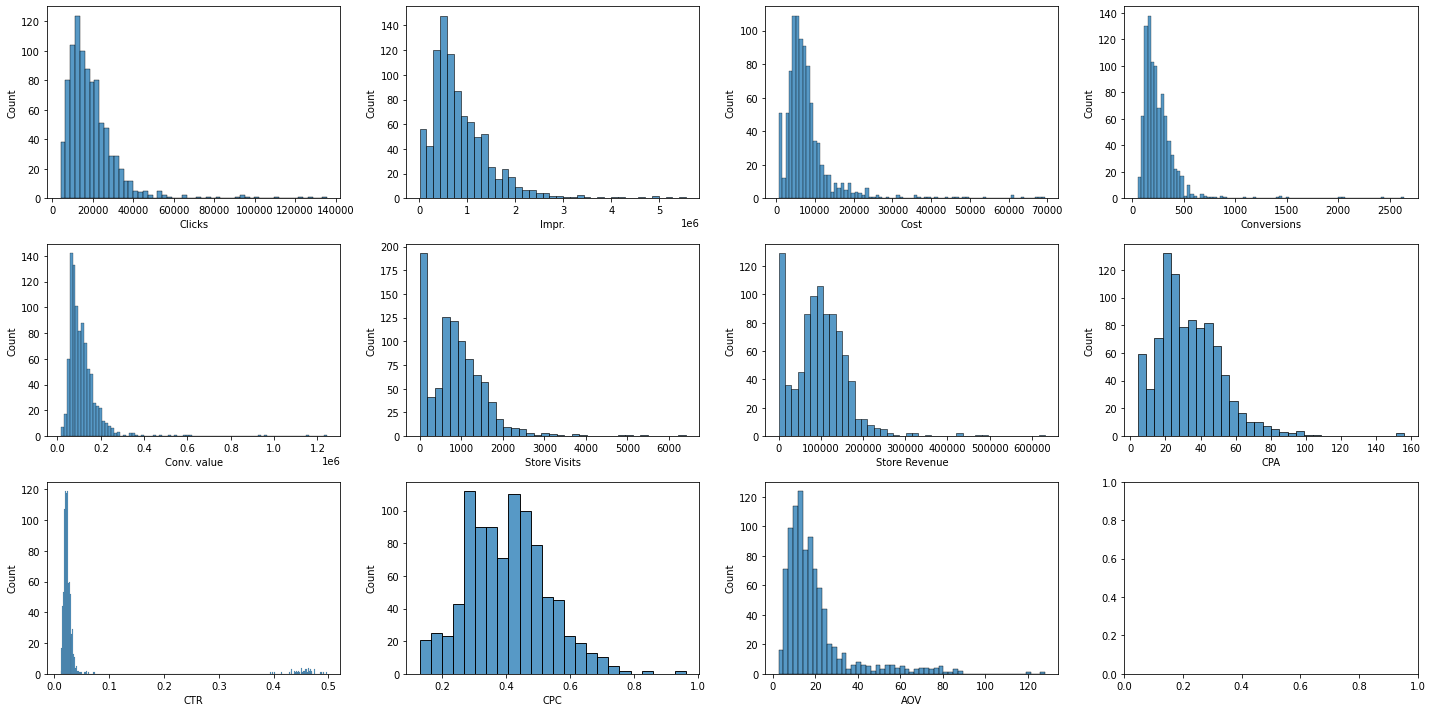

In [ ]:
names = groupedDailyDf.columns.drop(['Day','Week_no','Quarter','year','dayName','DayofYear','MonthName','Quarter2','WeekStart'])
fig, axes = plt.subplots(3,4,figsize=(20,10))

for name, ax in zip(names, axes.flatten()):
    sns.histplot(data=groupedDailyDf, x=name,ax=ax)
fig.tight_layout()    
plt.show()

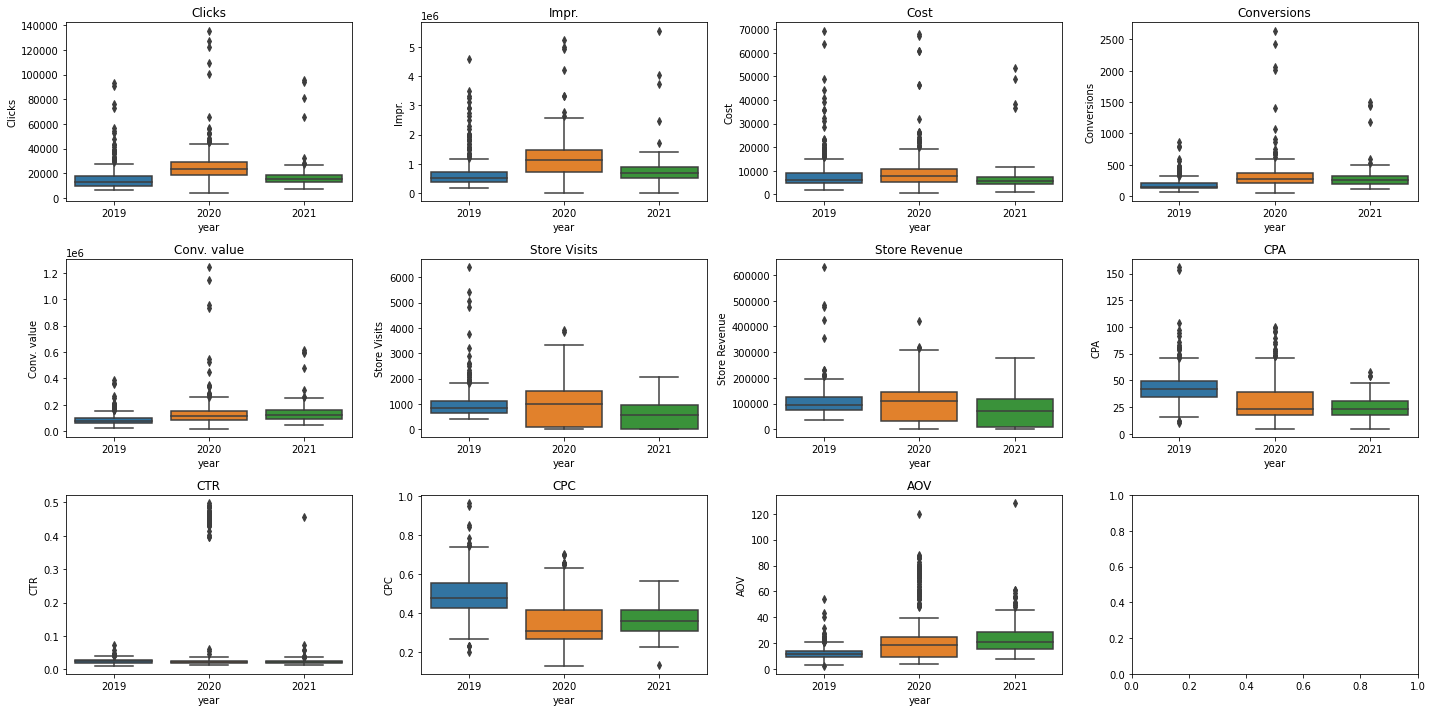

In [ ]:
names = groupedDailyDf.columns.drop(['Day','Week_no','Quarter','year','dayName','DayofYear','MonthName','Quarter2','WeekStart'])
fig, axes = plt.subplots(3,4,figsize=(20,10))

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x='year', y=name,data=groupedDailyDf, ax=ax)
    ax.set_title(name)
fig.tight_layout()    
plt.show()

Text(0.5, 1.0, 'Conversions MoM')

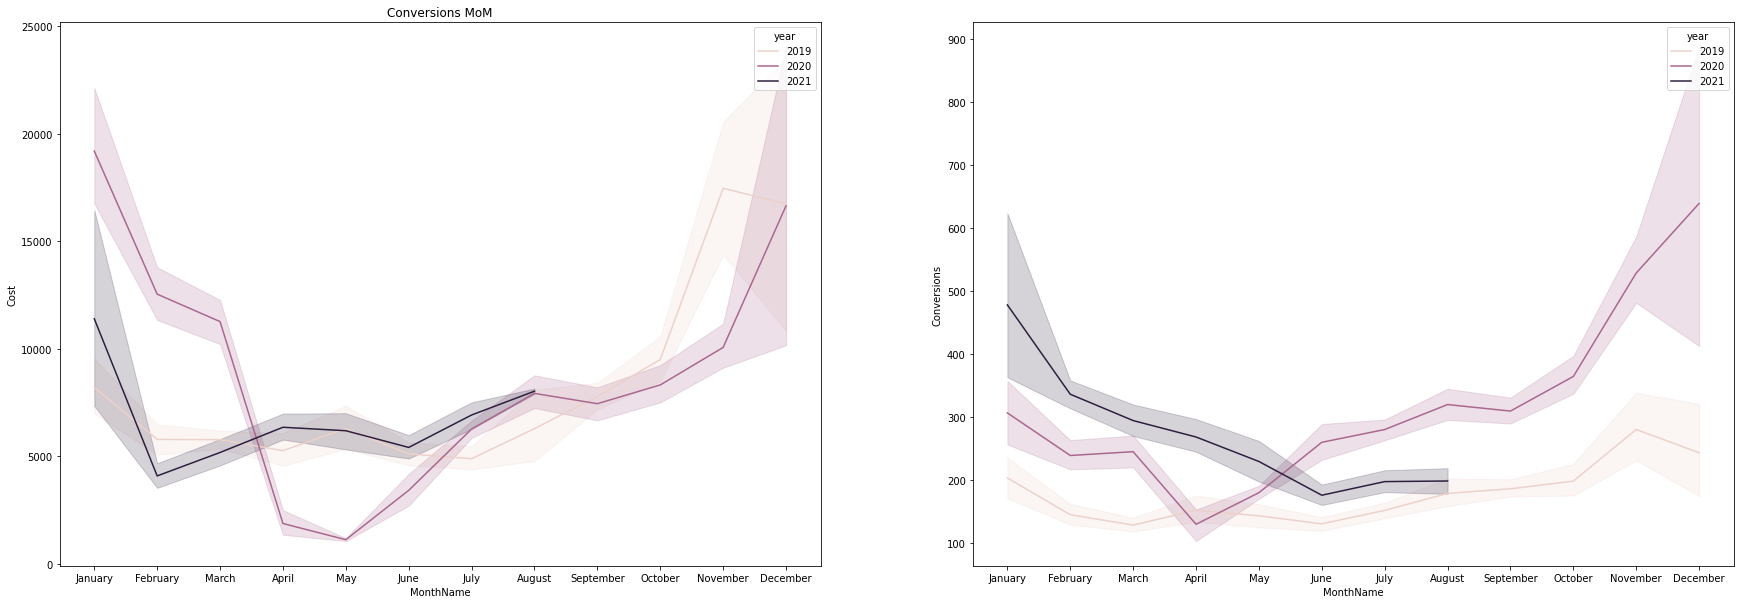

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(30,10))
sns.lineplot(data=groupedDailyDf,x ='MonthName', hue="year", y="Cost",ax=ax1)
ax1.set_title('Cost MoM')
sns.lineplot(data=groupedDailyDf,x ='MonthName', hue="year", y="Conversions",ax=ax2)
ax1.set_title('Conversions MoM')

# Correlation Analysis

Displays below outline strong correlation between numerous features.The following features exhibit high correlation with Conversions:


*   Clicks
*   Impressions
*   Cost
*   Conv Value

These features will be important in helping predict upcoming performance.




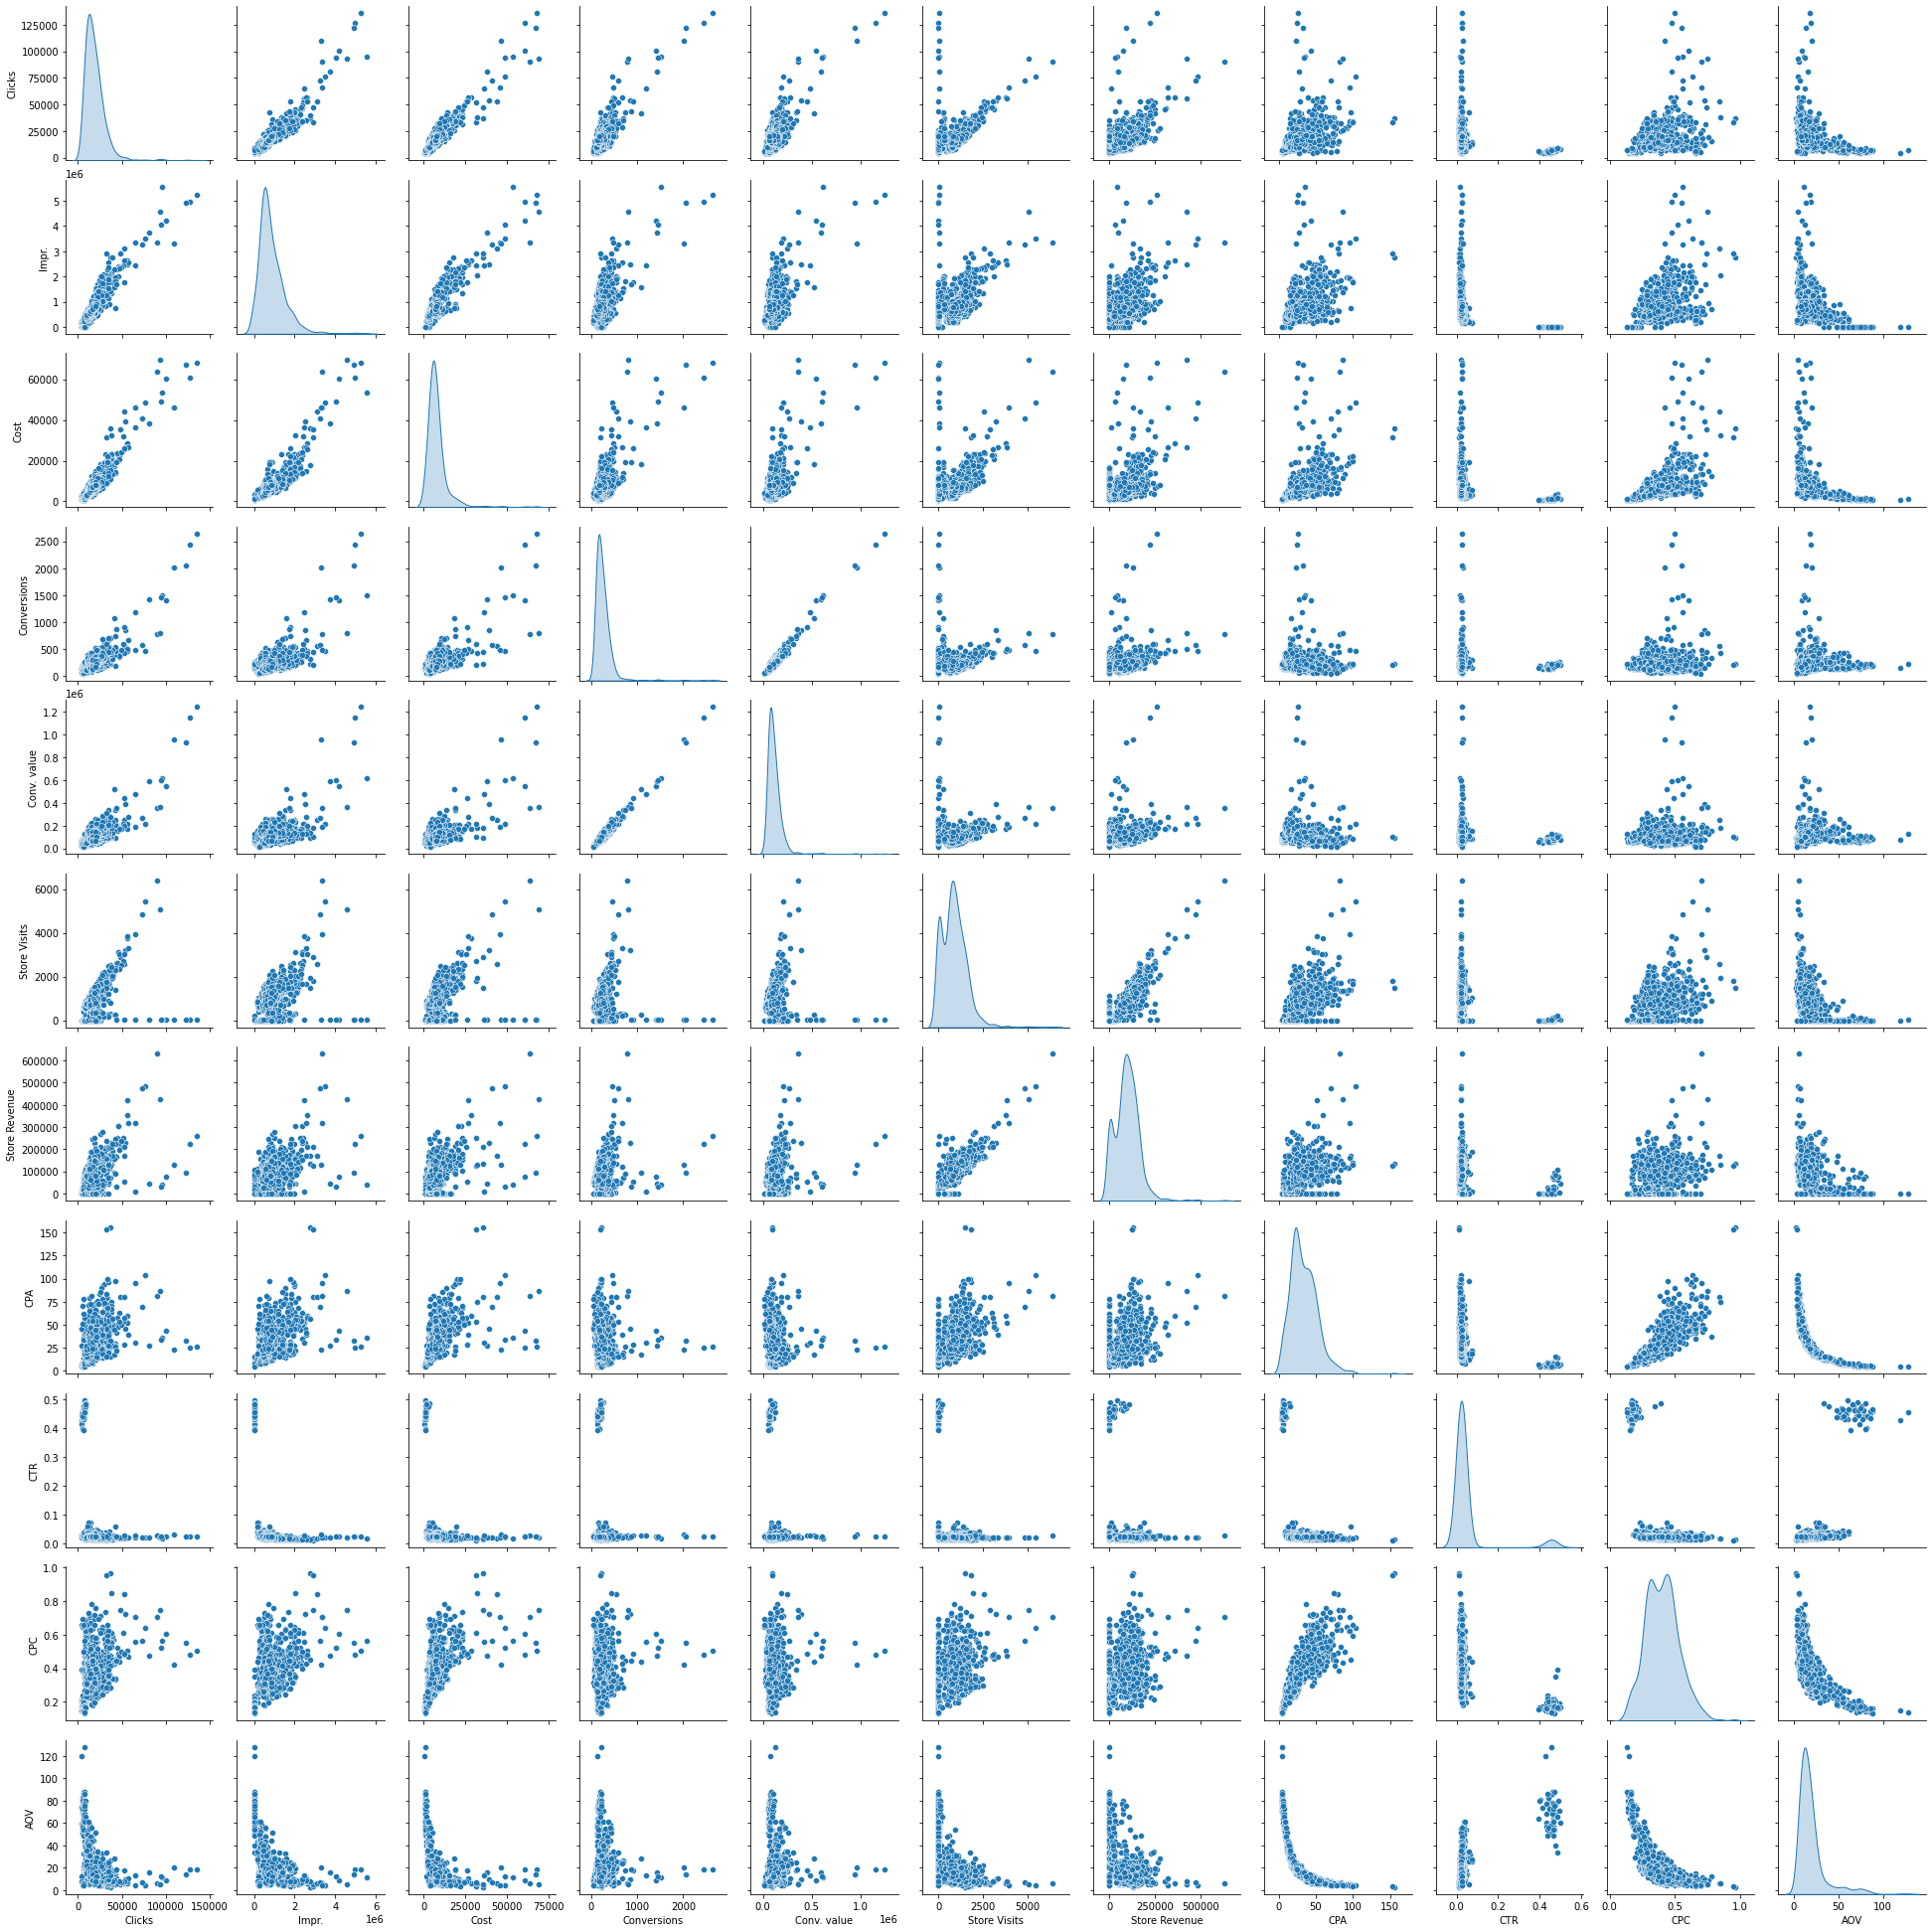

In [ ]:
intCols = groupedDailyDf.drop(['Day','Week_no','Quarter','year','dayName','DayofYear','MonthName','Quarter2','WeekStart'],axis=1)
sns.pairplot(intCols, palette="Set2", diag_kind="kde", height=2.5)

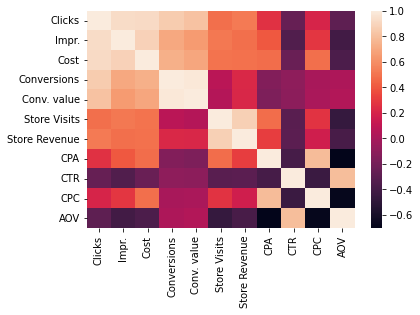

In [ ]:
sns.heatmap(intCols.corr())

In [ ]:
intCols.corr()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,CPA,CTR,CPC,AOV
Clicks,1.000000,0.931766,0.924460,0.855037,0.815191,0.487004,0.524080,0.261477,-0.254769,0.206156,-0.289844
Impr.,0.931766,1.000000,0.885015,0.703470,0.647826,0.515264,0.482067,0.402402,-0.345169,0.286621,-0.406112
Cost,0.924460,0.885015,1.000000,0.734649,0.699819,0.498726,0.487992,0.474883,-0.240719,0.482594,-0.364052
Conversions,0.855037,0.703470,0.734649,1.000000,0.986141,0.080374,0.226359,-0.140079,-0.095709,0.006901,0.022368
Conv. value,0.815191,0.647826,0.699819,0.986141,1.000000,0.051654,0.218860,-0.159320,-0.101857,0.008954,0.046400
Store Visits,0.487004,0.515264,0.498726,0.080374,0.051654,1.000000,0.877566,0.475581,-0.308296,0.269735,-0.462283
Store Revenue,0.524080,0.482067,0.487992,0.226359,0.218860,0.877566,1.000000,0.310583,-0.299427,0.171829,-0.383879
CPA,0.261477,0.402402,0.474883,-0.140079,-0.159320,0.475581,0.310583,1.000000,-0.390818,0.793363,-0.705484
CTR,-0.254769,-0.345169,-0.240719,-0.095709,-0.101857,-0.308296,-0.299427,-0.390818,1.000000,-0.443896,0.798671
CPC,0.206156,0.286621,0.482594,0.006901,0.008954,0.269735,0.171829,0.793363,-0.443896,1.000000,-0.685437


# Review Conponents
This section aims to identify the most important components of this dataset.Conversions have been excluded as this is the feature we trying to predict.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
columns = ['Clicks', 'Impr.', 'Cost', 'Conv. value',
       'Store Visits', 'Store Revenue', 'CPA', 'CTR', 'CPC', 'AOV']
data2Scale = groupedDailyDf[columns]
scaled = scale(data2Scale.values)
data_scaled_df = pd.DataFrame(scaled, columns=columns)
data_scaled_df.head()

,Clicks,Impr.,Cost,Conv. value,Store Visits,Store Revenue,CPA,CTR,CPC,AOV
0,1.266928,0.041252,1.422765,0.832647,1.918765,1.797216,0.374342,-0.091758,0.953089,-0.602529
1,0.902757,-0.040217,1.443423,0.809964,1.483396,1.228950,0.557889,-0.122128,1.630492,-0.614511
2,0.175615,-0.632693,0.059902,0.087607,0.917837,1.116248,-0.139023,-0.007080,-0.050107,-0.329515
3,0.233447,-0.451424,0.225432,0.018373,1.129222,0.852771,0.441584,-0.097387,0.284706,-0.485580
4,0.533035,-0.149009,0.619963,0.379147,1.670983,1.505782,0.393794,-0.149803,0.657572,-0.501456


In [ ]:
scaledDF_pca = PCA().fit(scaled)

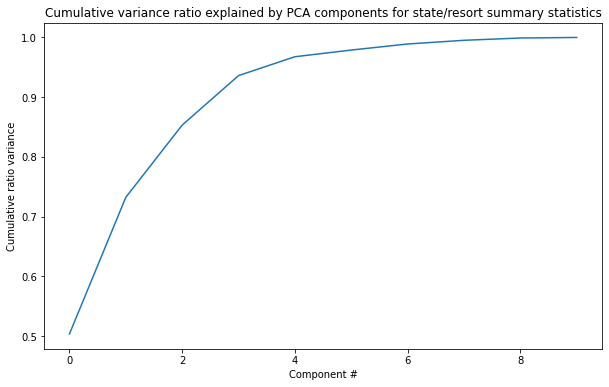

In [ ]:
plt.subplots(figsize=(10, 6))
plt.plot(scaledDF_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

# Summary

We have:
1. Cleaned data into a useable format
2. Reviewed the distribution of the data
3. Analysed the relationship between features
4. Identified most import PCA components.